### 2.3.4 Naive Bayes Classifiers
- LogisticRegression 이나 LinearSVC보다 훈련 속도가 빠르지만 일반화 성능이 조금 떨어짐
- scikit-learn 모델
  - GaussianNB
    - 연속 데이터에 적용
  - BernoulliNB
    - 이진 데이터에 적용
  - MultinomialNB
    - 카운트 데이터에 적용 
    - 예를 들면, 문장에 나타난 단어의 횟수
- 베이즈 정리
  - $\displaystyle P(A∣B)= \frac{P(B∩A)}{P(B)}=\frac{P(A)P(B∣A)}{P(B)}$
  ![!](https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Bayes%27_Theorem_MMB_01.jpg/440px-Bayes%27_Theorem_MMB_01.jpg)
  - [Source: wikipedia]
  <br/><br/>
- 베이즈 분류
  - 입력 데이터의 내용이 $X=(x_1, x_2, ..., x_p)$로 주어졌을 때 $Y=k$일 확률
    - $\displaystyle P(Y = k ~|~ X_1 = x_1, X_2=x_2, ... , X_p = x_p)=P(Y = k) P(X_1 = x_1, X_2=x_2, ... , X_p = x_p~|~Y = k)$<br/><br/>
  - 입력 데이터의 각 특성값의 조건부 분포가 서로 독립이라는 단순 베이즈 가정을 한다면
    - $\displaystyle P(Y = k ~|~ X_1 = x_1, X_2=x_2, ... , X_p = x_p)=P(Y = k) \prod_{j=1}^{p}P(X_j = x_j~|~Y = k)$<br/><br/>
  - 따라서, 입력 데이터의 내용이 $X=(x_1, x_2, ..., x_p)$로 주어졌을 때 $Y$ 예측 방법
    - $\displaystyle argmax_{k\in Y} \big{(}P(Y = k) \prod_{j=1}^{p}P(X_j = x_j~|~Y = k)\big{)}$

In [2]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [4]:
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [7]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, y)
print("Prediction:", clf.predict([[0, 0, 0, 0]]))
print("Prediction:", clf.predict([[1, 1, 1, 1]])) 

Prediction: [0]
Prediction: [1]


#### Strengths, weaknesses and parameters

### Decision trees

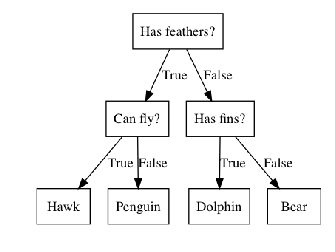

In [6]:
mglearn.plots.plot_animal_tree()

##### Building decision trees

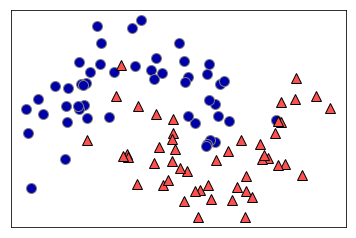

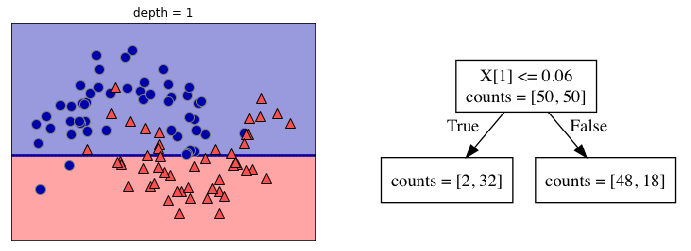

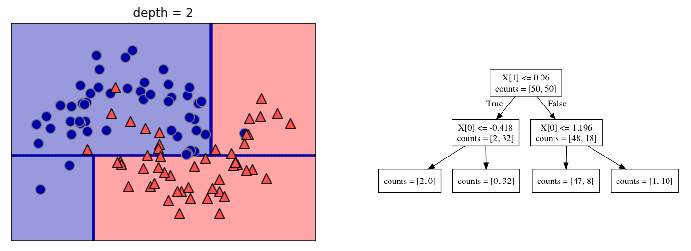

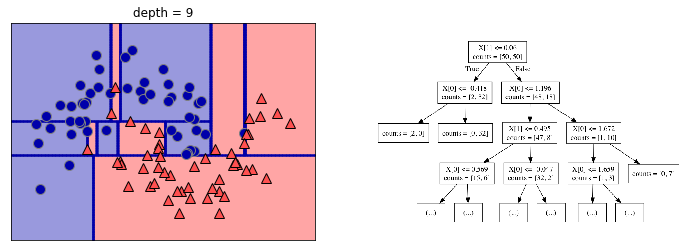

In [8]:
mglearn.plots.plot_tree_progressive()

##### Controlling complexity of decision trees

- Pre-pruning (사전 가지치기): 트리내 노드 생성을 사전에 중단
  - scikit-learn 에서 지원하는 것
  - 트리의 최대 깊이 제한
  - 트리 내 리프 노드 개수 제한
  - 분할 노드 개수 제한
- Post-pruning (사후 가지치기) or Pruning: 트리의 노드를 만든 이후 데이터 포인트가 적은 노드를 삭제하거나 병합

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_test.shape))

print()

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Shape of X_train: (426, 30)
Shape of X_test: (143, 30)

Accuracy on training set: 1.000
Accuracy on test set: 0.937


- 테스트 집합에 대한 0.937 정확도는 이전의 LogisticRegression의 테스트 집합 정확도보다 작음.

- 트리의 깊이 제한
  - max_depth=4

In [14]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


#### Analyzing Decision Trees

In [15]:
from sklearn.tree import export_graphviz
export_graphviz(tree, 
                out_file="tree.dot", 
                class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, 
                impurity=True, # When set to True, show the impurity (gini) at each node.
                filled=True # 노드의 분류 클래스가 구분되도록 색이 칠해짐
)

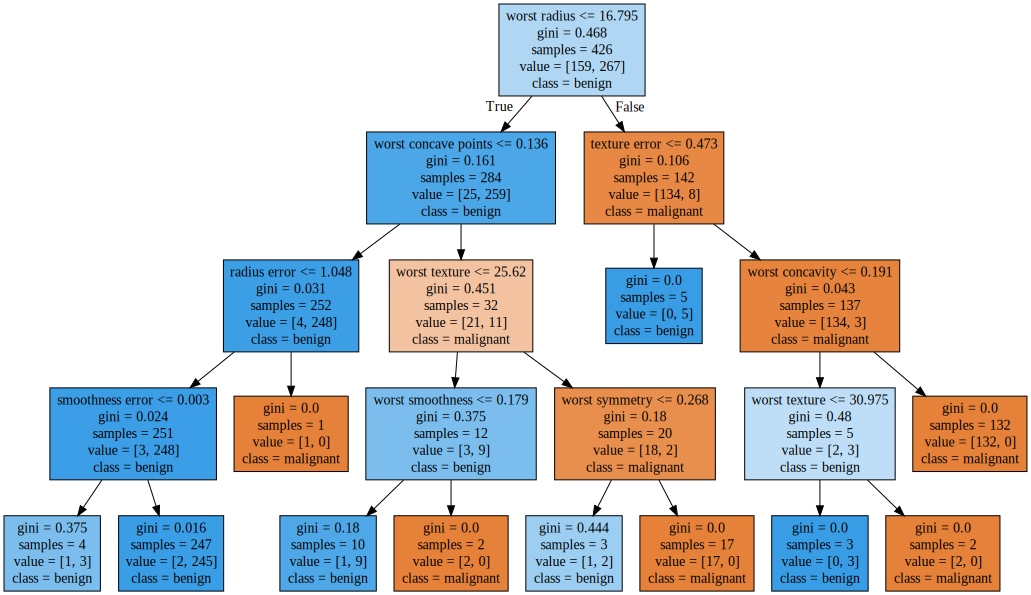

In [16]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

- 첫번째 루트 노드
  - 악성 샘플: 159, 양성 샘플: 267
- 루트 노드의 오른쪽 가지 노드
  - 악성 샘플: 134, 양성 샘플: 8
- 루트 노드의 왼쪽 가지 노드 
  - 악성 샘플: 25, 양성 샘플: 259

#### Feature Importance in trees
- 특성 중요도 (Feature Impotance)
  - 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가
    - 0: 해당 특성이 분류에 전혀 활용되지 않았음
    - 1: 해당 특성이 분류를 하였고, 타깃 클래스를 정확하게 예측하였음을 나타냄

In [19]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.01  0.048
 0.    0.    0.002 0.    0.    0.    0.    0.    0.727 0.046 0.    0.
 0.014 0.    0.018 0.122 0.012 0.   ]


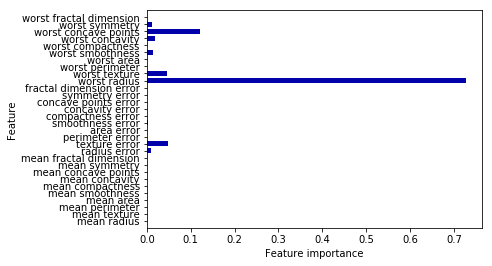

In [20]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.show()

plot_feature_importances_cancer(tree)

- 특성 중요도는 항상 양수이며, 어떤 클래스를 지지하는 지 알 수는 없다.
  - 아래 예에서 X[1] 특성은 두 개 클래스를 동시에 지지함.

Feature importances: [0. 1.]


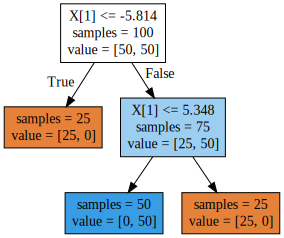

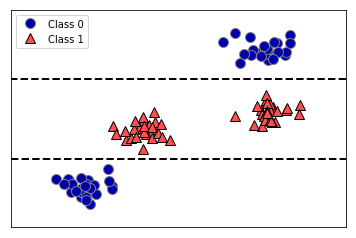

In [21]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

- Regression with DecisionTreeRegressor
- plt.semilogy()
  - Make a plot with log scaling on the `y` axis.

(333, 3)
   Unnamed: 0    date     price
0           0  1957.0  4.11e+08
1           1  1959.0  6.79e+07
2           2  1960.0  5.24e+06


Text(0,0.5,'Price in $/Mbyte')

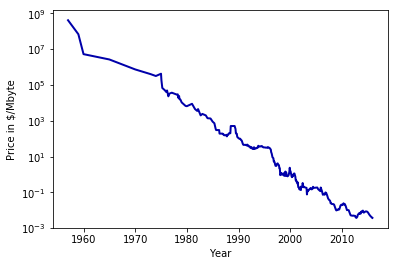

In [22]:
import os

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
print(ram_prices.shape)
print(ram_prices.head(3))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [23]:
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

print(data_train.shape)
print(data_train.head(3))

print()

print(data_test.shape)
print(data_test.head(3))

(202, 3)
   Unnamed: 0    date     price
0           0  1957.0  4.11e+08
1           1  1959.0  6.79e+07
2           2  1960.0  5.24e+06

(131, 3)
     Unnamed: 0     date  price
202         202  2000.00   1.56
203         203  2000.08   1.48
204         204  2000.17   1.08


In [24]:
# predict prices based on date
# np.newaxis 으로 새로운 demension 생성
temp_X_train = data_train.date
print(temp_X_train.shape)
print(temp_X_train[0])
print(temp_X_train[1])

print()

X_train = data_train.date[:, np.newaxis]
print(X_train.shape)
print(X_train[0])
print(X_train[1])

print()

# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)
print(y_train.shape)
print(y_train[0])
print(y_train[1])

(202,)
1957.0
1959.0

(202, 1)
[1957.]
[1959.]

(202,)
19.83420545098937
18.034249217500573


- 날짜 대비 메모리 가격의 관계를 선형으로 변경하여 예측 성능을 높힘.

In [26]:
X_test = data_test.date[:, np.newaxis]
y_test = np.log(data_test.price)

In [31]:
from sklearn.linear_model import LinearRegression

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data (훈련 데이터와 테스트 데이터를 포함한 모든 데이터에 대하여 예측 수행)
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

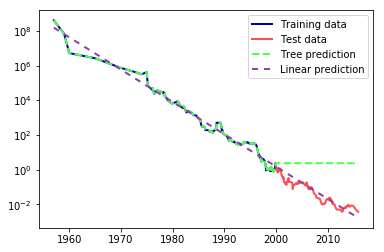

In [30]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

- 위 트리 모델 훈련시에 모델 복잡도에 제한을 두지 않았음. 
  - 훈련 데이터를 완벽하게 예측함 --> 과적합
- 트리 모델을 사용한 테스트 시에 예측해야 할 값이 모델을 생성할 때 사용한 데이터 범위 밖에 존재할 때 트리는 적당하지 않음.

#### Strengths, weaknesses and parameters

- 트리 모델의 장점
  - 만들어진 모델을 쉽게 시각화하고 이해할 수 있음.
  - 각 특성은 개별적으로 다루어지기 때문에 특성의 정규화가 필요없음.
    - 각 특성의 스케일이 서로 달라도 문제 없이 모델 학습이 이루어짐.<br/><br/>

- 트리 모델의 단점
  - 사전 가지치기를 사용할 지라도 종종 과대적합되는 경향이 있음. --> 해결책: Ensemble